# Tarefa - Análise de Contratos

# **Geração de Dados**

In [ ]:
!pip install pandas faker

**Importar dados**

In [3]:
import pandas as pd
import random
from faker import Faker
from datetime import datetime, timedelta

**Faker para gerar dados fictícios**

In [4]:
fake = Faker('pt_BR')

**Gerar dados dos "contratos"**

In [5]:
quantidade_de_contratos = 100
dados_contrato = []
for _ in range(quantidade_de_contratos):
    numero_contrato = fake.random_int(min=1000, max=9999)
    data_assinatura = fake.date_between(start_date='-5y', end_date='today')
    valor_contrato = round(random.uniform(10000, 50000), 2)
    duracao_contrato = fake.random_int(min=1, max=5)
    cnpj_fornecedor = fake.cnpj()
    nome_fornecedor = fake.company()
    agencia_governamental = fake.company()
    #valor_total_contrato = valor_contrato
    valor_pago = 0
    valor_a_pagar = valor_contrato
    data_pagamento_parcela = [fake.date_between_dates(date_start=data_assinatura, date_end=data_assinatura + timedelta(days=365 * duracao_contrato)) for _ in range(duracao_contrato)]

    # Dados Geográficos (gerados aleatoriamente)
    latitude = round(random.uniform(-90, 90), 6)
    longitude = round(random.uniform(-180, 180), 6)

    # Histórico de Pagamentos (lista de pagamentos)
    historico_pagamentos = []
    for i in range(duracao_contrato):
        valor_parcela = round(random.uniform(0, valor_a_pagar), 2)
        data_pagamento = data_pagamento_parcela[i]
        valor_a_pagar -= valor_parcela
        valor_pago += valor_parcela
        historico_pagamentos.append({'Data Pagamento': data_pagamento, 'Valor': valor_parcela})

    # Adicione os dados à lista
    dados_contrato.append([numero_contrato, data_assinatura, valor_contrato, duracao_contrato, cnpj_fornecedor, nome_fornecedor, agencia_governamental, valor_pago, valor_a_pagar, data_pagamento_parcela, latitude, longitude, historico_pagamentos])

**DataFrame a partir dos dados**

In [6]:
df = pd.DataFrame(dados_contrato, columns=["Número do contrato", "Data de assinatura do contrato", "Valor do contrato",
                                           "Duração do contrato", "CNPJ da empresa ou fornecedor contratado","Nome da empresa ou fornecedor contratado",
                                           "Nome da agência governamental",
                                           "Valor pago até o momento", "Valor a ser pago no futuro",
                                           "Data de pagamento de parcelas", "Latitude", "Longitude", "Histórico de Pagamentos"])


**DataFrame em um arquivo CSV**

In [7]:
df.to_csv('dados_contrato.csv', index=False)
print("Planilha de dados gerada e salva em 'dados_contrato.csv'")

Planilha de dados gerada e salva em 'dados_contrato.csv'


In [8]:
df

,Número do contrato,Data de assinatura do contrato,Valor do contrato,Duração do contrato,CNPJ da empresa ou fornecedor contratado,Nome da empresa ou fornecedor contratado,Nome da agência governamental,Valor pago até o momento,Valor a ser pago no futuro,Data de pagamento de parcelas,Latitude,Longitude,Histórico de Pagamentos
0,8430,2019-01-08,38791.35,3,31.652.879/0001-80,Costela,Sales Souza - EI,38763.93,27.42,"[2020-09-16, 2019-04-29, 2020-05-13]",-21.182438,-128.484227,"[{'Data Pagamento': 2020-09-16, 'Valor': 23560..."
1,8867,2021-06-11,13277.90,5,27.953.684/0001-00,Viana Ltda.,Duarte da Cruz - ME,12944.64,333.26,"[2022-11-16, 2021-08-11, 2022-01-15, 2025-10-0...",-46.647635,103.237805,"[{'Data Pagamento': 2022-11-16, 'Valor': 5727...."
2,2583,2021-01-03,23679.05,1,71.568.920/0001-59,Barros,da Rosa S.A.,6536.11,17142.94,[2021-06-22],-58.117563,36.408676,"[{'Data Pagamento': 2021-06-22, 'Valor': 6536...."
3,8866,2019-09-30,13803.08,4,24.571.890/0001-50,Cardoso - EI,Silva,13378.58,424.50,"[2023-08-17, 2022-11-16, 2022-12-02, 2020-12-03]",48.482493,-177.258808,"[{'Data Pagamento': 2023-08-17, 'Valor': 4284...."
4,2055,2020-07-02,23353.71,1,29.870.631/0001-43,Campos,Fogaça S/A,3018.94,20334.77,[2021-03-30],-61.573592,-74.660723,"[{'Data Pagamento': 2021-03-30, 'Valor': 3018...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3585,2019-01-21,30584.18,4,21.637.905/0001-47,Duarte,da Rocha,28377.05,2207.13,"[2019-03-20, 2022-07-11, 2022-09-01, 2020-05-26]",-29.046446,-146.610847,"[{'Data Pagamento': 2019-03-20, 'Valor': 10192..."
96,6765,2023-11-09,45663.18,4,72.386.014/0001-04,Martins,Cunha da Rosa - EI,40013.45,5649.73,"[2024-05-20, 2027-09-25, 2025-05-07, 2025-10-03]",-79.626269,124.614223,"[{'Data Pagamento': 2024-05-20, 'Valor': 3592...."
97,8547,2023-02-07,37447.34,5,80.745.369/0001-62,Souza S/A,Monteiro,36947.37,499.97,"[2026-09-20, 2027-12-18, 2023-06-25, 2028-01-2...",40.859333,-128.835298,"[{'Data Pagamento': 2026-09-20, 'Valor': 27182..."
98,6164,2022-09-15,47119.92,4,02.864.157/0001-90,Cardoso,Correia e Filhos,46949.66,170.26,"[2024-10-07, 2026-02-27, 2025-05-06, 2026-08-04]",-60.706271,169.834771,"[{'Data Pagamento': 2024-10-07, 'Valor': 38138..."


# **Analisar Contratos**

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Dados do arquivo CSV**

In [10]:
dados_contrato = pd.read_csv('dados_contrato.csv')

**Exibir as primeiras linhas do DataFrame para verificar os dados**

In [11]:
print(dados_contrato.head())

   Número do contrato Data de assinatura do contrato  Valor do contrato  \
0                8430                     2019-01-08           38791.35   
1                8867                     2021-06-11           13277.90   
2                2583                     2021-01-03           23679.05   
3                8866                     2019-09-30           13803.08   
4                2055                     2020-07-02           23353.71   

   Duração do contrato CNPJ da empresa ou fornecedor contratado  \
0                    3                       31.652.879/0001-80   
1                    5                       27.953.684/0001-00   
2                    1                       71.568.920/0001-59   
3                    4                       24.571.890/0001-50   
4                    1                       29.870.631/0001-43   

  Nome da empresa ou fornecedor contratado Nome da agência governamental  \
0                                  Costela              Sales Souza - 



*   **Análise exploratória simples**
*   **Estatísticas descritivas dos valores dos contratos**



In [12]:
estatisticas_contratos = dados_contrato[['Valor do contrato', 'Valor pago até o momento', 'Valor a ser pago no futuro']].describe()
print(estatisticas_contratos)

       Valor do contrato  Valor pago até o momento  Valor a ser pago no futuro
count         100.000000                100.000000                  100.000000
mean        31957.030700              25097.827500                 6859.203200
std         11747.092605              12711.144949                 8850.368951
min         11541.040000               3018.940000                    0.020000
25%         21900.742500              13883.360000                  548.755000
50%         30887.935000              24120.930000                 2722.115000
75%         42936.290000              36116.950000                10288.987500
max         49931.400000              47949.840000                36840.880000


In [13]:
df_valor = dados_contrato.sort_values(by="Valor do contrato", ascending=False)
print(df_valor.head(10))

    Número do contrato Data de assinatura do contrato  Valor do contrato  \
51                5441                     2019-03-09           49931.40   
41                3176                     2020-04-28           49747.94   
76                3432                     2018-12-23           49486.29   
25                2642                     2020-11-30           49273.41   
70                5138                     2022-12-16           48557.28   
59                8840                     2020-04-15           47951.84   
72                1222                     2020-12-25           47823.13   
13                2754                     2023-09-06           47683.76   
39                6144                     2021-03-22           47527.64   
40                5599                     2021-10-26           47397.29   

    Duração do contrato CNPJ da empresa ou fornecedor contratado  \
51                    2                       75.189.620/0001-10   
41                    2    

# **Exercício**

**Faça uma análise do histórico de pagamentos. Sua análise precisa de recursos gráficos e responder as seguintes perguntas:**



1.   **Quais são os principais fornecedores?**
2.   **Quais regiões receberam mais verbas ?**
3.   **Quanto falta para pagar de cada contrato?**
4.   **Que colunas deveriam ser acrescentadas para auxiliar na detecção de fraudes?**
5.   **Visualização da distribuição da duração dos contratos**
6.   **Fazer uma análise com regressão linear sobre verbas**



## 1 - Quais são os principais fornecedores?

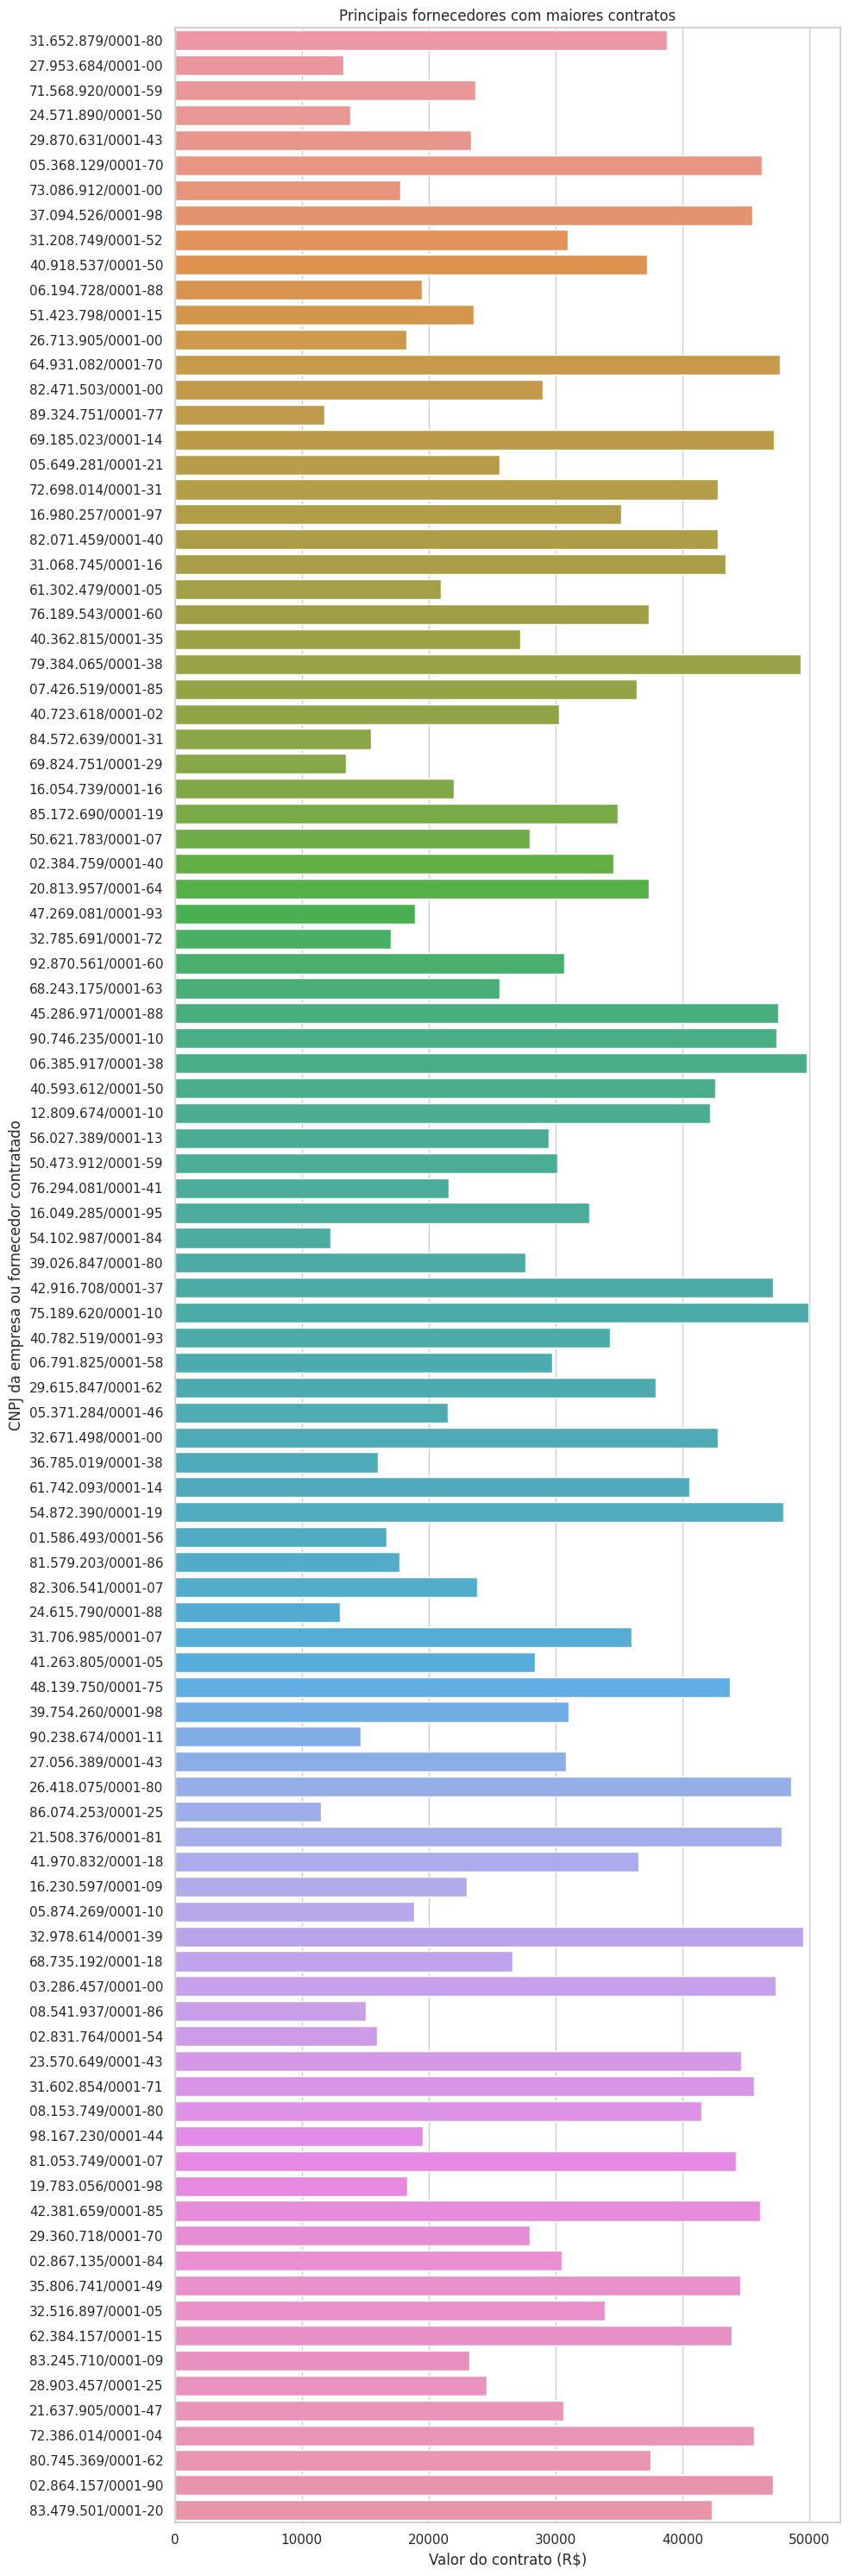

In [14]:
plt.figure(figsize=(10, 30))
sns.set(style='whitegrid')

sns.barplot(data=dados_contrato, orient='h', x="Valor do contrato", y="CNPJ da empresa ou fornecedor contratado")
plt.title('Principais fornecedores com maiores contratos')
plt.xlabel('Valor do contrato (R$)')
plt.tight_layout()

##2 - Quais regiões receberam mais verbas ?

## 3 - Quanto falta para pagar de cada contrato?

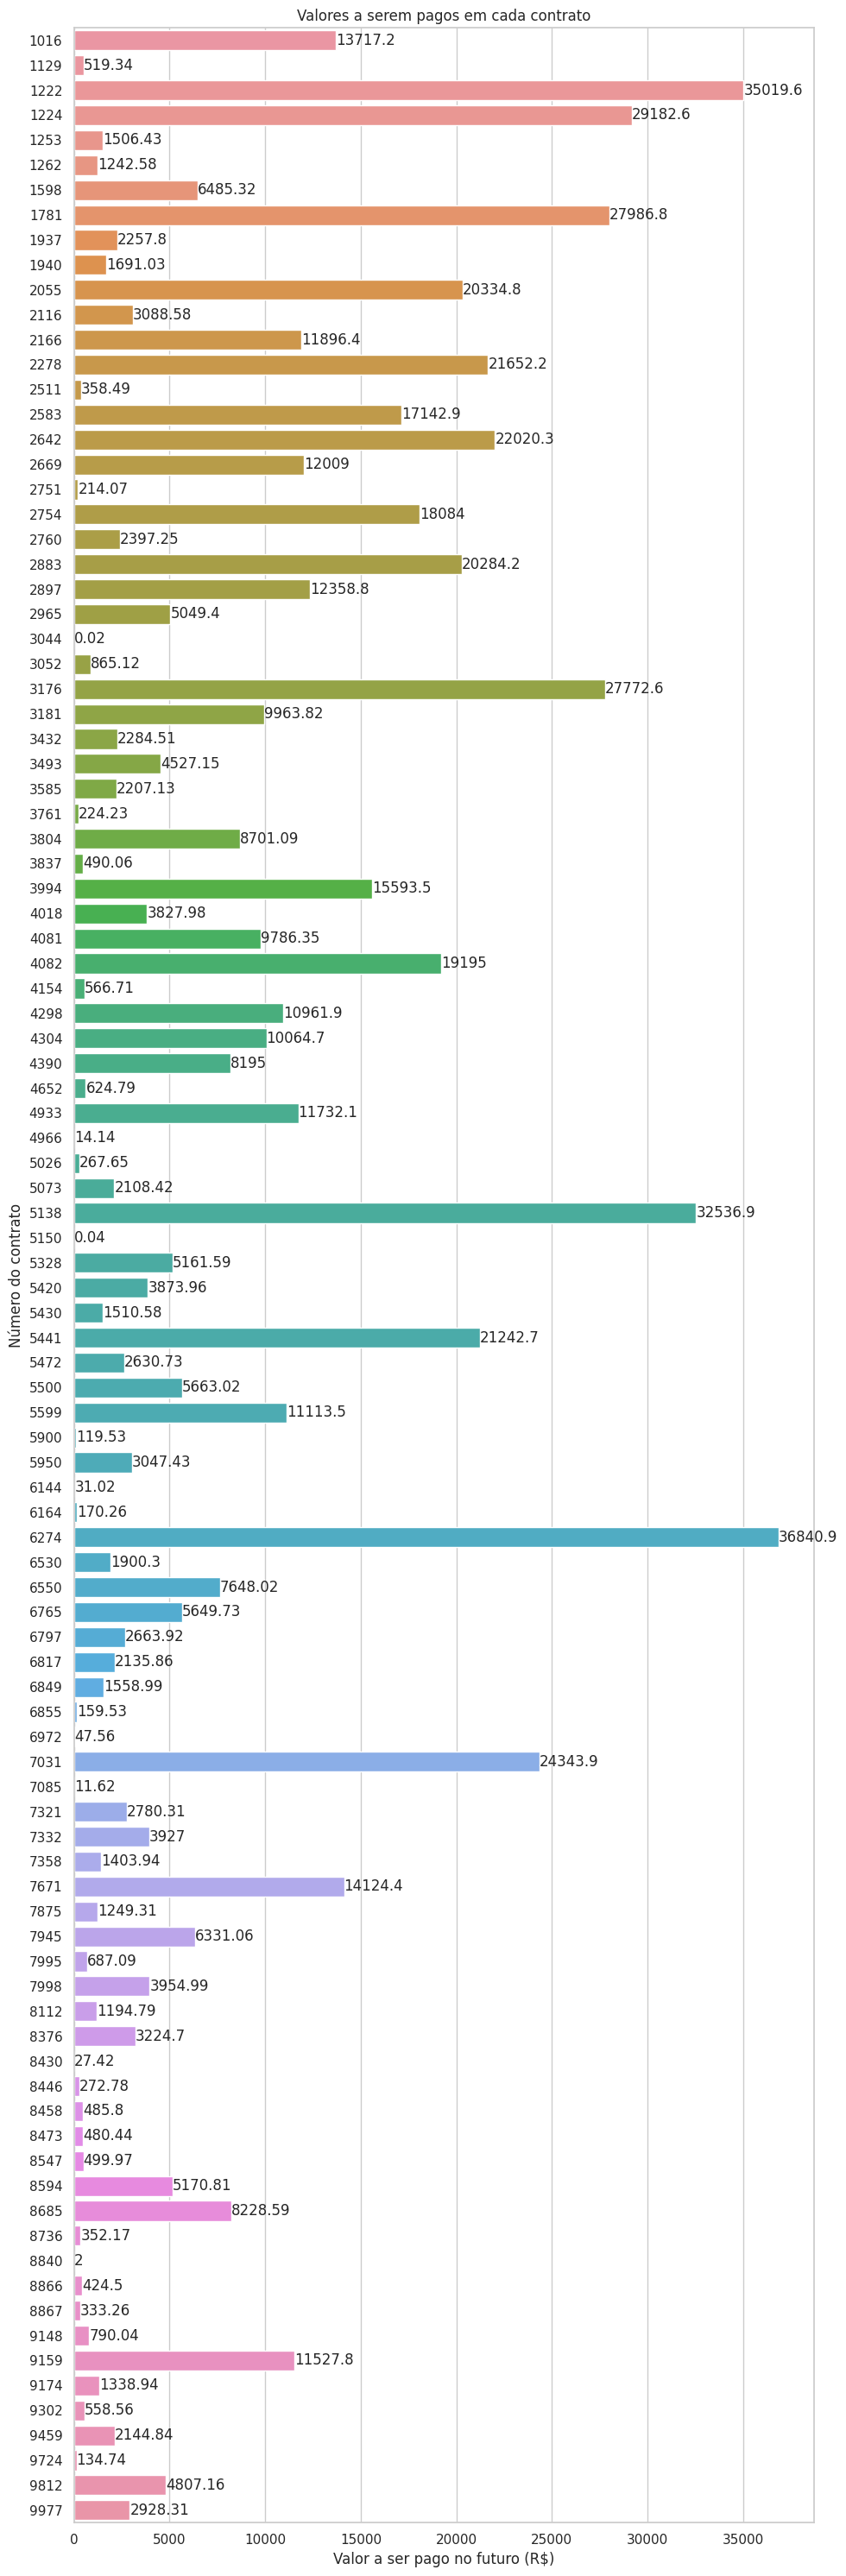

In [15]:
plt.figure(figsize=(10, 30))
sns.set(style='whitegrid')

ax = sns.barplot(data=dados_contrato, orient='h', x="Valor a ser pago no futuro", y="Número do contrato")
ax.bar_label(ax.containers[0])
plt.title('Valores a serem pagos em cada contrato')
plt.xlabel('Valor a ser pago no futuro (R$)')
plt.tight_layout()

## 4 - Que colunas deveriam ser acrescentadas para auxiliar na detecção de fraudes?

Fizemos a inclusão da coluna CNPJ. Ela pode ser utilizada para consulta a base de dados da Receita Federal, por exemplo para verificar se o CNPJ é de uma empresa real e regularizada junto ao governo. Além disso, podemos utilizar o CNPJ para consultar os CPFs dos sócios da empresa fornecedora, verificando se algum sócio é funcionário do orgão público, evitando assim o conflito de interesses ou uma contratação fraudulenta com informações privilegiadas.

## Outras análises gráficas realizadas

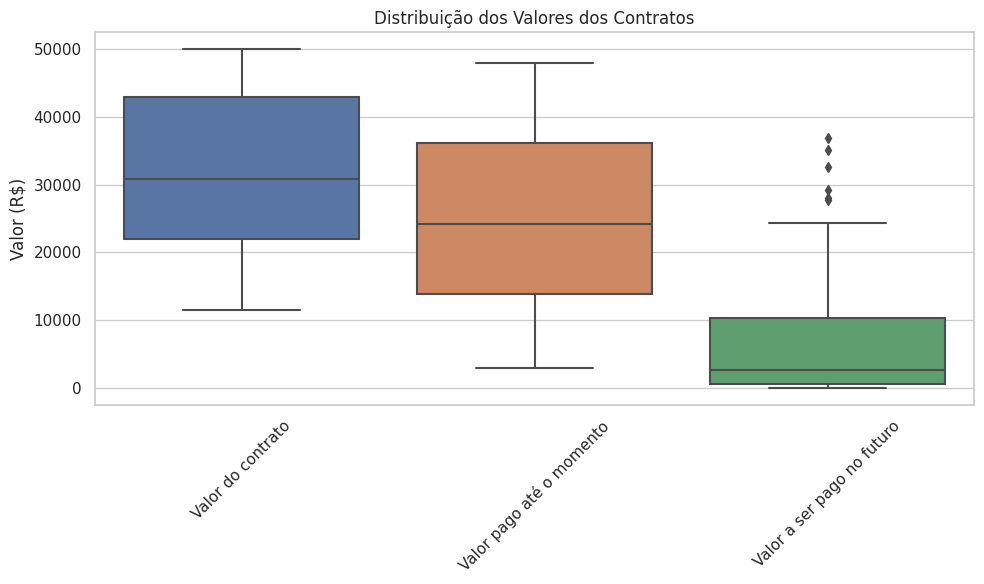

In [17]:
# Visualização dos valores dos contratos
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.boxplot(data=dados_contrato[['Valor do contrato', 'Valor pago até o momento', 'Valor a ser pago no futuro']])
plt.title('Distribuição dos Valores dos Contratos')
plt.ylabel('Valor (R$)')
plt.xticks(rotation=45)
plt.tight_layout()

**Visualização da localização geográfica dos contratos**

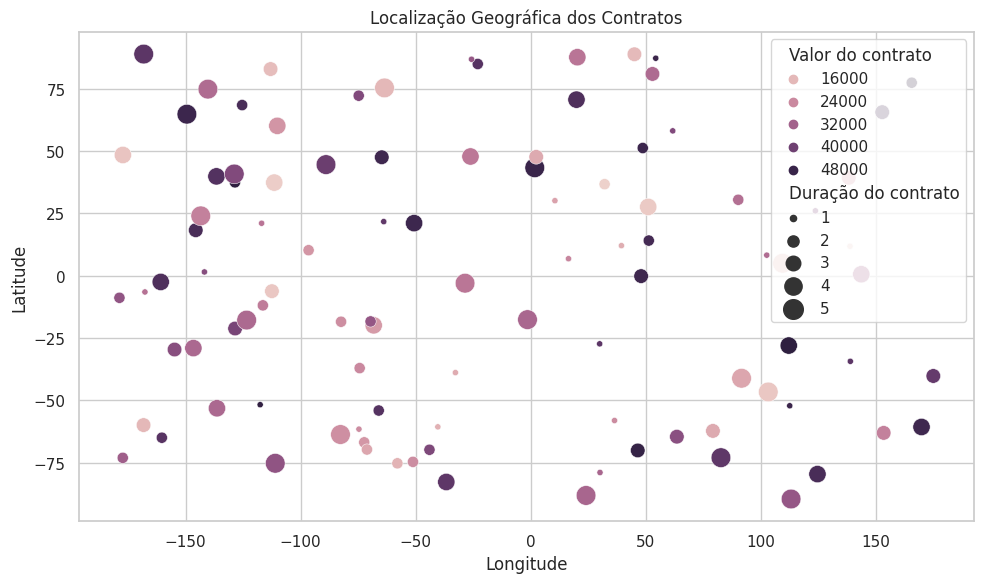

In [18]:
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.scatterplot(data=dados_contrato, x='Longitude', y='Latitude', hue='Valor do contrato', size='Duração do contrato', sizes=(20, 200))
plt.title('Localização Geográfica dos Contratos')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()

**Exemplo de análise adicional: Correlação entre variáveis**

<ipython-input-19-d62044239887>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = dados_contrato.corr()


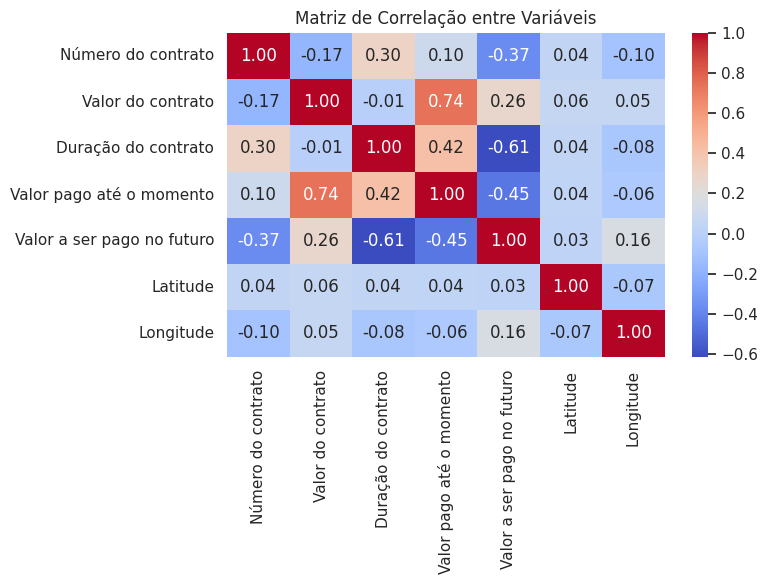

In [19]:
correlacao = dados_contrato.corr()
plt.figure(figsize=(8, 6))
sns.set(style='whitegrid')
sns.heatmap(data=correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Variáveis')
plt.tight_layout()

plt.show()

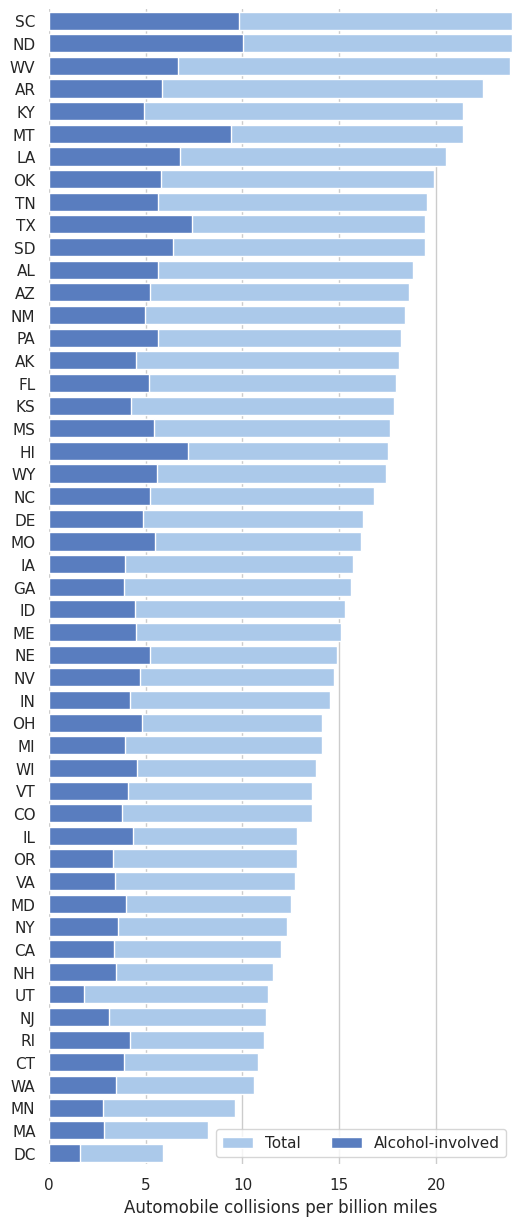

In [21]:
#Quanto falta para pagar de cada contrato?
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)